In [13]:
#########################################################################################
#    Filename : Proj_Resonance_Lorentzian_GitHub_Run_Me.ipynb
#    Date : Aug 25, 2015
#    What : Runs the main file, which is def_resonance_lorentzian.py
#           You must give it four parameters
#
#########################################################################################
import scipy
import numpy as np
import def_resonance_lorentzian_for_github as drl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(18,6)

''' Tell me the file which you wanna look at'''
dset = np.load('/Users/TzeGoh/Desktop/2015-07-01-starcryo-nevins-initial-sweep.npz')
dset.keys()
print "Keys:",dset.keys()                  

Keys: ['lo', 'freq', 'data']


In [14]:
''' This cell tells you the main variables --> x-axis(freq) and y-axis (data)'''
input_x = raw_input ("What is the frequency ? usually 'freq', don't put parathensis: ")
input_y = raw_input ("What is the data ? usually 'data', do not put parathensis: ")
freq = dset[input_x] 
raw_data = dset[input_y]
data = raw_data.copy()
print 'Length of data:', len(data)

What is the frequency ? usually 'freq', don't put parathensis: freq
What is the data ? usually 'data', do not put parathensis: data
Length of data: 32768


In [15]:
''' Just toggle these 4 parameters'''
flat = 1.2              # flat is the gradient of the points around centre // flat = 1.2
move = 5                # move is the number of points around of centre    // move = 5
noise = 5               # noise is how many points away from 'move'        // noise = 5
tol = 1                 # tolerance determine spread of lorentz function   // tol = 1

In [16]:
''' This cell fixes x and y for the rest of the programme, as well as where to look for the minimums  '''
a = freq 
b = data
x = a
y = 20 * np.log10(np.abs(b))
locmins,order_of_mins = drl.resonators(flat,move,noise,tol,x,y)
ranges_to_look, freq_to_look, data_to_look = drl.where_do_i_look(locmins,x,y)   
xstart, xend, ystart, yend = drl.box_in_the_plot(ranges_to_look, freq_to_look, data_to_look)

length of data 32768
There are 36 resonators, and they occur at ...'
Resonator 	Frequency 	data numbers
1 		1220.9765625 	-33.1219951956
2 		1221.25 	-32.8532786777
3 		1226.171875 	-34.4539471071
4 		1227.46875 	-34.2255308117
5 		1236.9609375 	-34.9767043493
6 		1248.1484375 	-35.0230008177
7 		1251.75 	-32.9079550993
8 		1252.0859375 	-32.1999891693
9 		1263.9765625 	-31.0803250273
10 		1268.703125 	-33.6111148132
11 		1275.3984375 	-29.6476439313
12 		1283.171875 	-30.4361533103
13 		1288.8203125 	-27.6973588984
14 		1291.328125 	-35.6302226431
15 		1297.7265625 	-27.7788344157
16 		1304.0390625 	-26.4336752332
17 		1305.1015625 	-34.5468471503
18 		1310.0625 	-27.8254459921
19 		1318.4921875 	-33.5482191418
20 		1346.328125 	-25.2203384846
21 		1352.125 	-28.5604651254
22 		1356.1640625 	-27.7355898259
23 		1359.65625 	-25.8192480918
24 		1368.8828125 	-25.1404558801
25 		1372.59375 	-29.3762206551
26 		1385.734375 	-25.5779921556
27 		1387.3984375 	-30.1442885274
28 		1389.445312

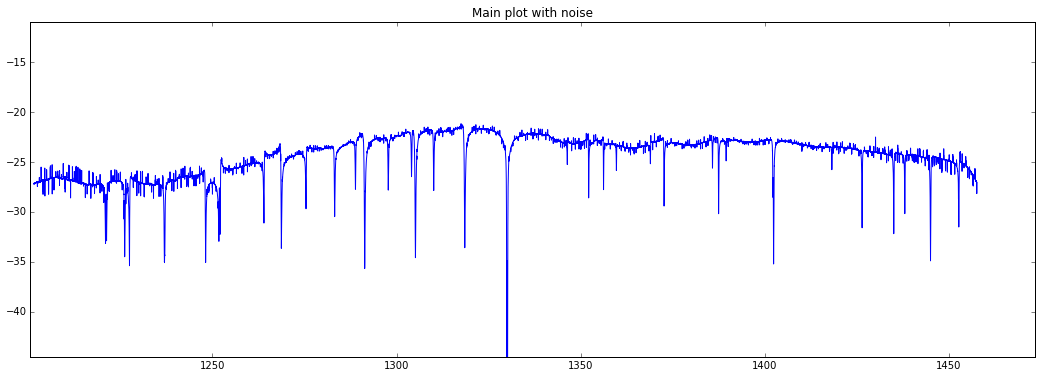

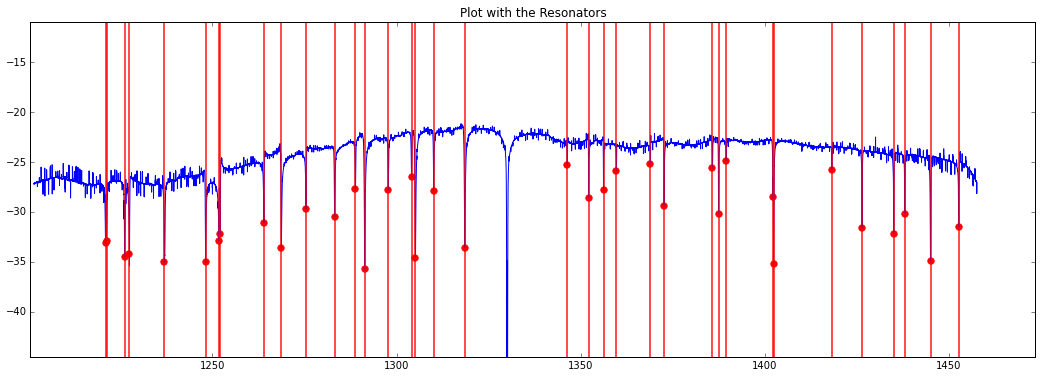

In [17]:
'''This shows you the main plot'''
drl.main_plot_with_noise(x,y,xstart,xend,ystart,yend)
plt.figure()

'''This shows you where the resonators are, and prints out those points for you'''
drl.show_me_resonators(order_of_mins,data,x,y,xstart,xend,ystart,yend)
plt.figure()


Enter : 1)See Resonance close up 2)See Resonance close-up w/ Lorentzian only ( This is usually enough ) 3)See Resonance close-up, and then see Resonance close-up Lorentzian 2
The number of fits with Chi_square more than 100 is 2
The number of fits with Chi_square less than 1 is 7
Resonator 	Chi_square 	at these Frequencies
1 		3.20781440324 	1220.9765625
2 		1.97168993574 	1221.25
3 		0.14749572427 	1226.171875
4 		65.3081690897 	1227.46875
5 		11.1658294688 	1236.9609375
6 		77.3980218632 	1248.1484375
7 		16.5930376968 	1251.75
8 		9.11888516869 	1252.0859375
9 		60.4072291613 	1263.9765625
10 		173.512355778 	1268.703125
11 		37.326653699 	1275.3984375
12 		21.5959235042 	1283.171875
13 		0.586312173621 	1288.8203125
14 		178.122720952 	1291.328125
15 		0.475124614128 	1297.7265625
16 		2.07146184792 	1304.0390625
17 		62.4713465476 	1305.1015625
18 		8.09197532611 	1310.0625
19 		96.6829821473 	1318.4921875
20 		1.98255774937 	1346.328125
21 		13.3925015828 	1352.125
22 		6.1711462

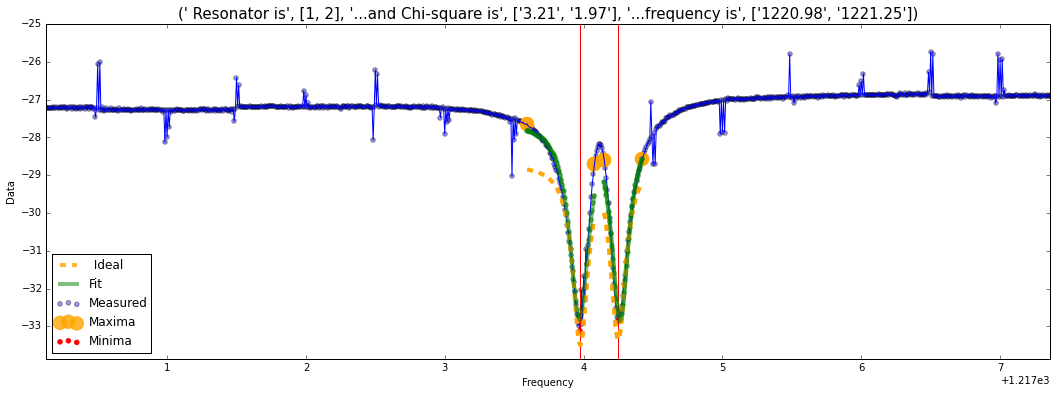

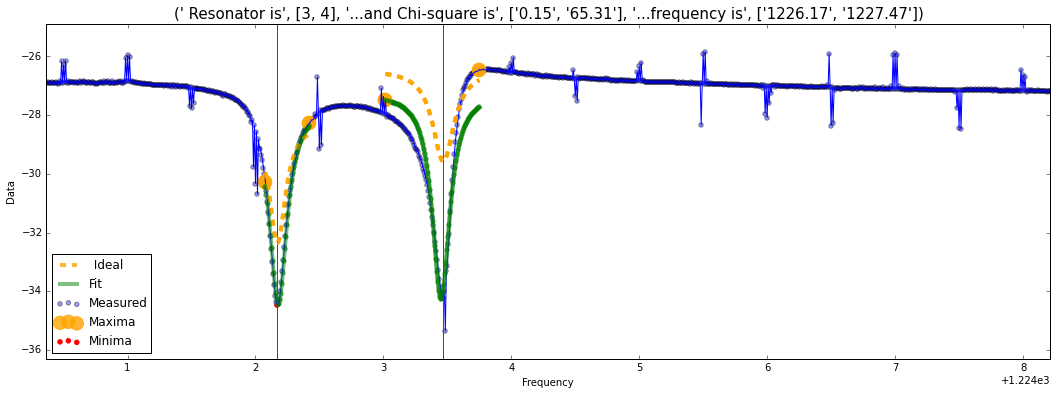

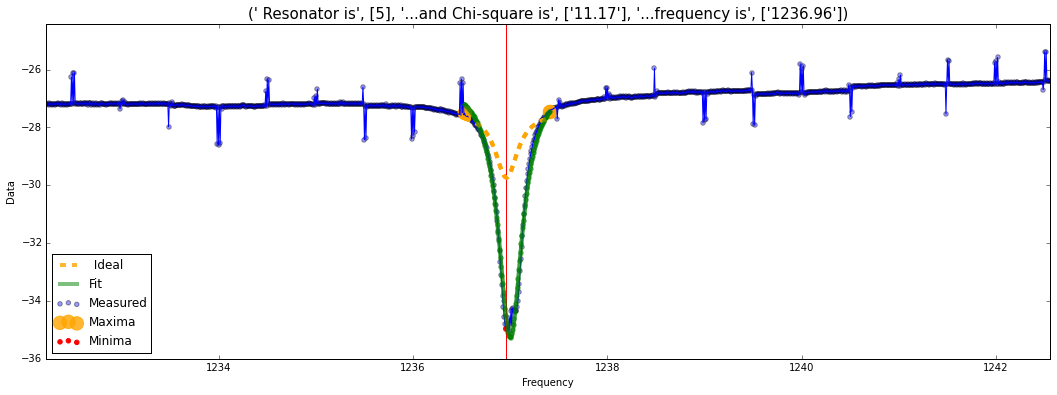

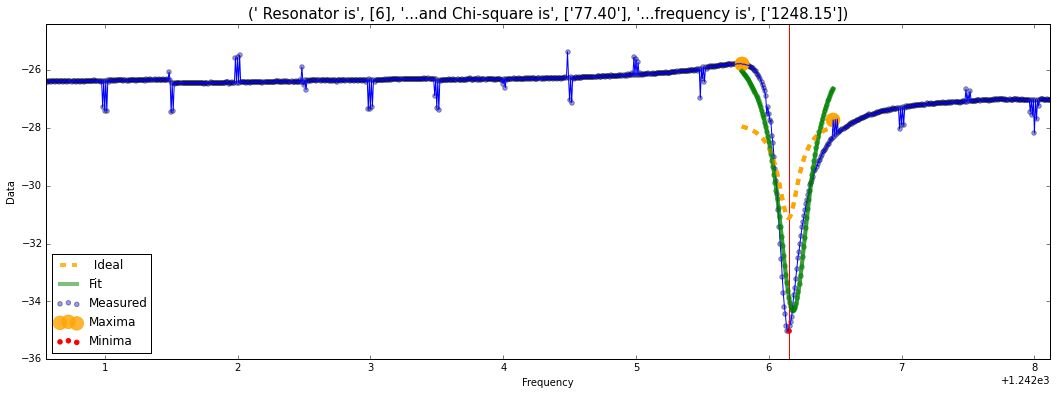

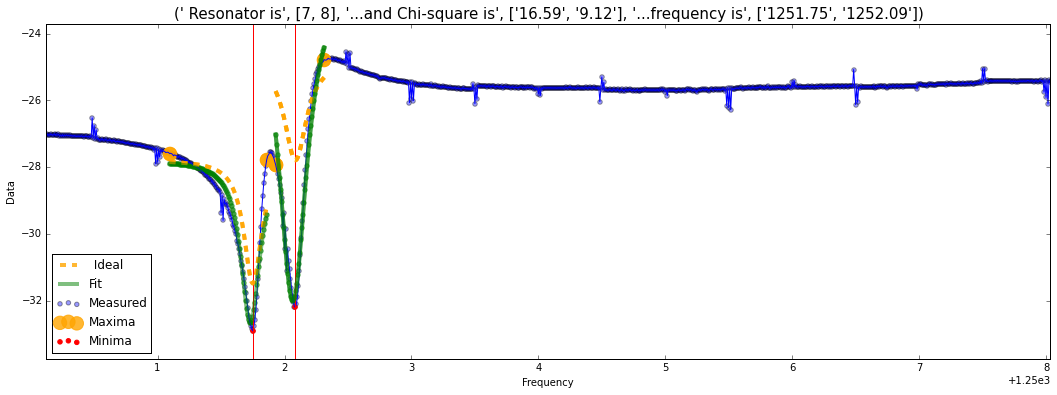

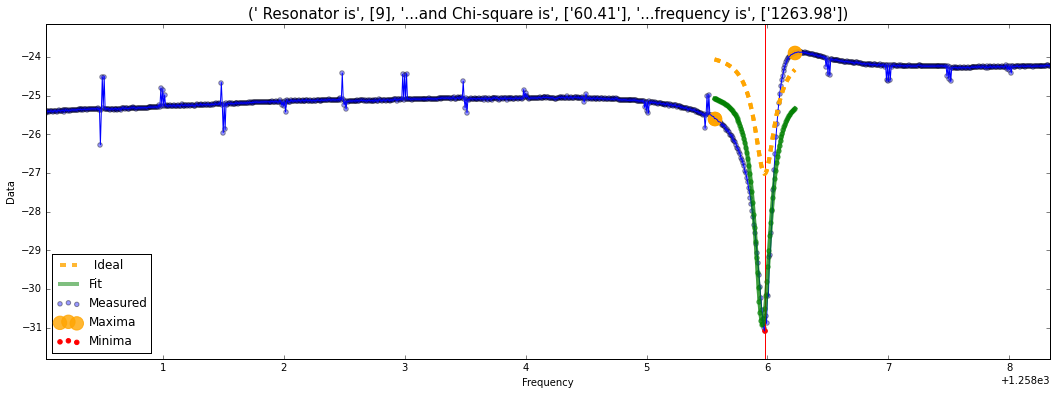

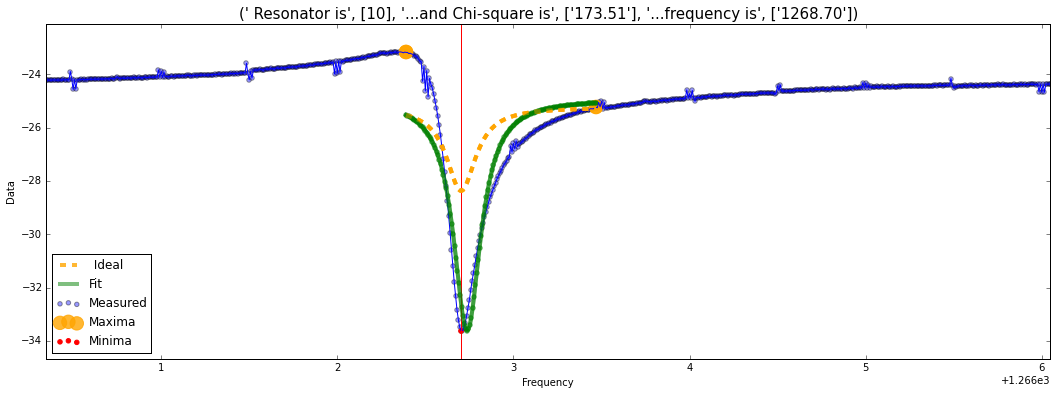

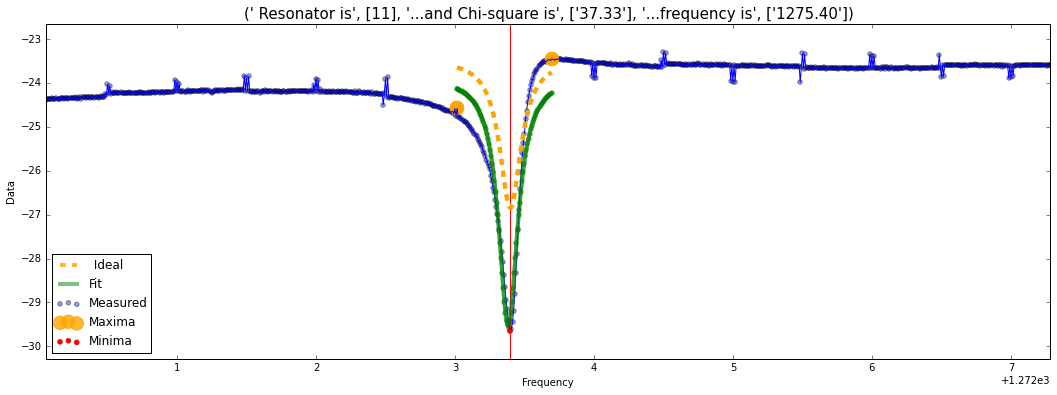

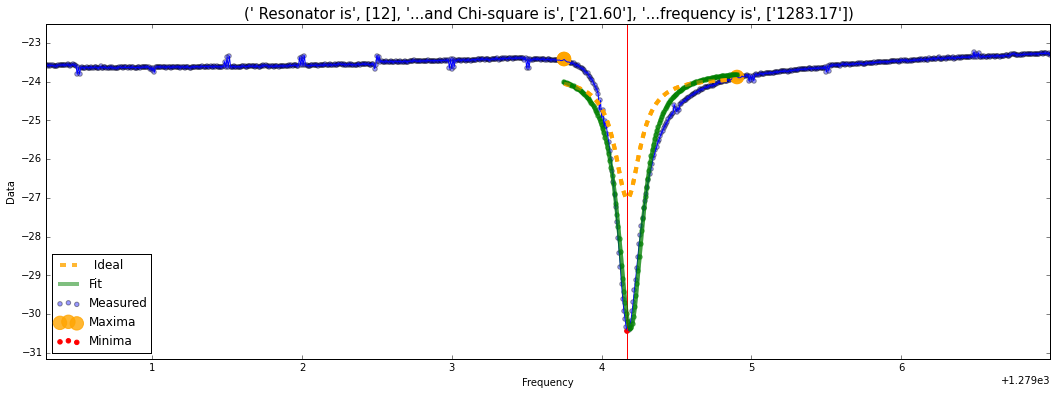

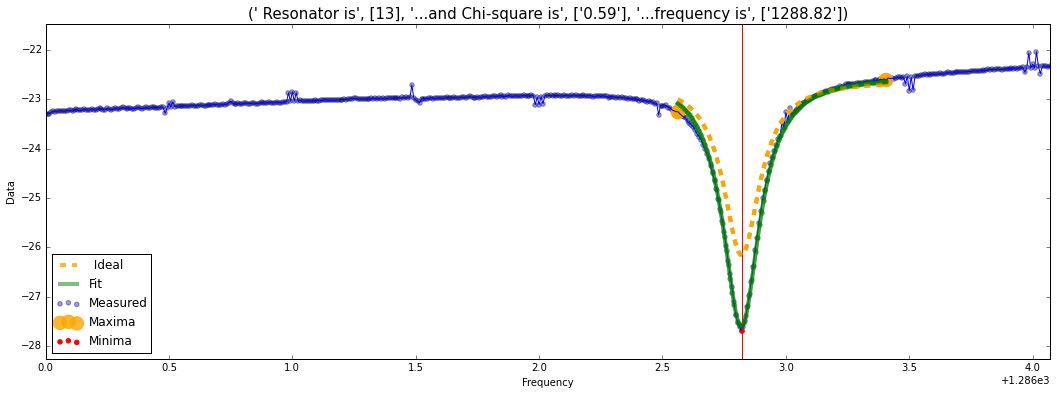

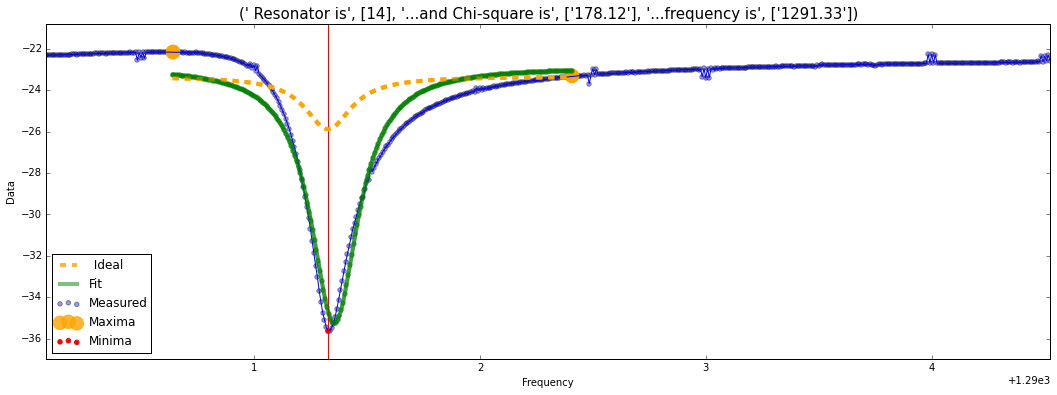

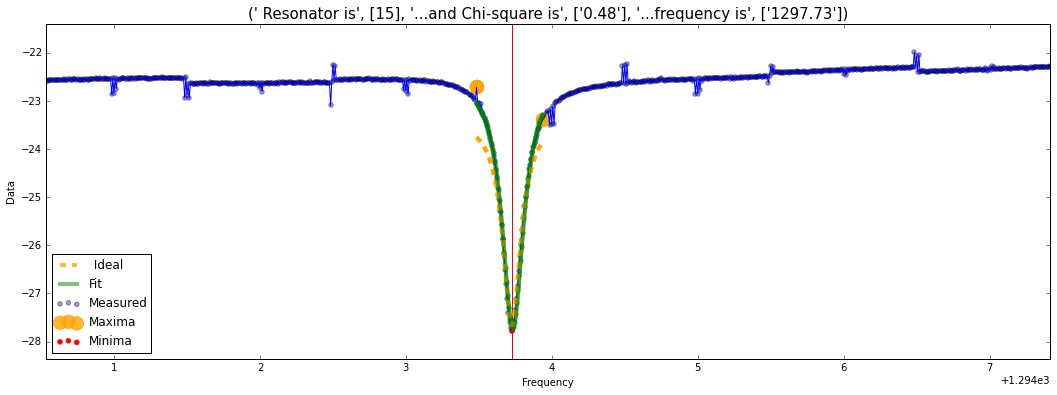

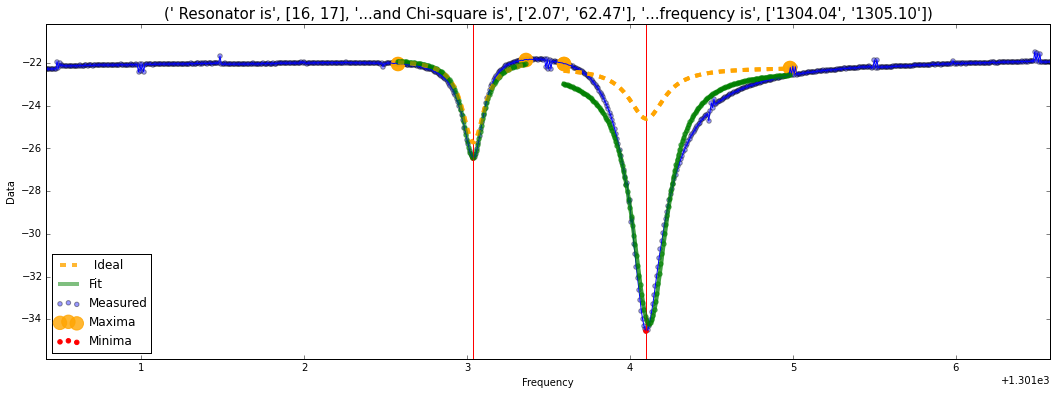

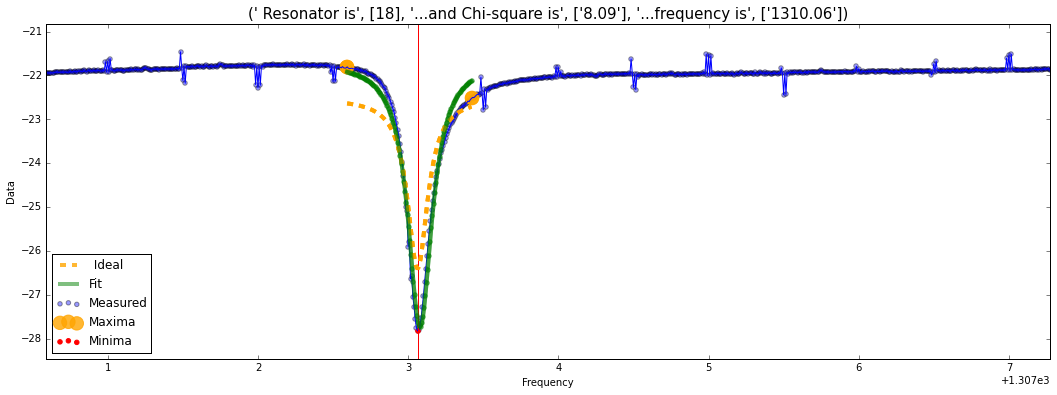

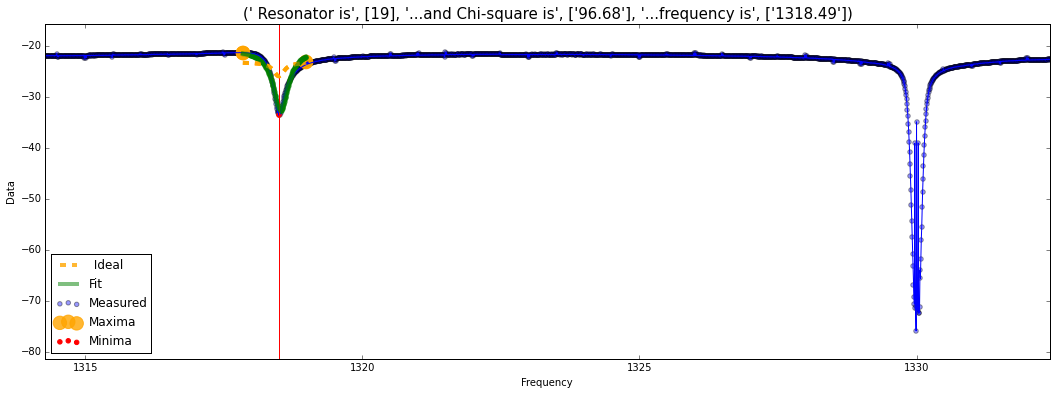

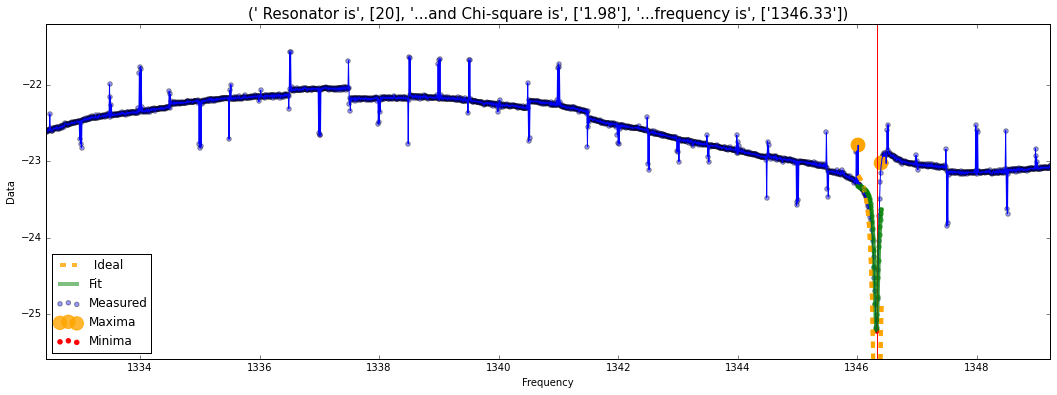

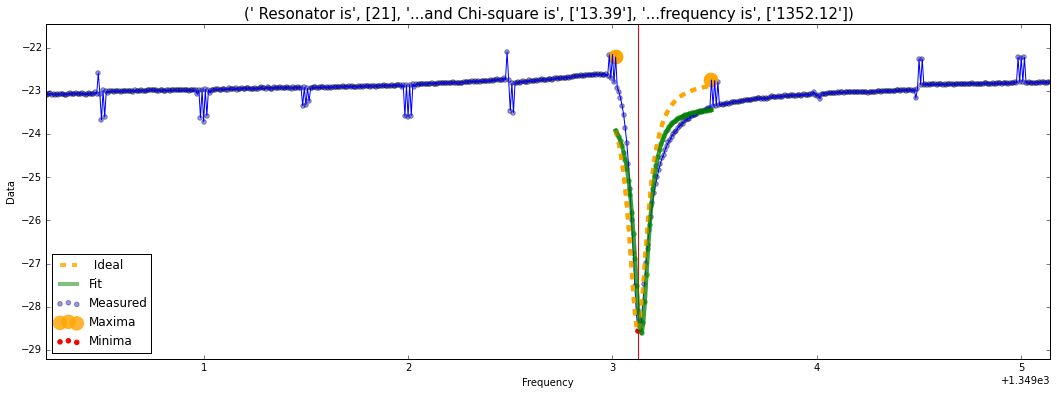

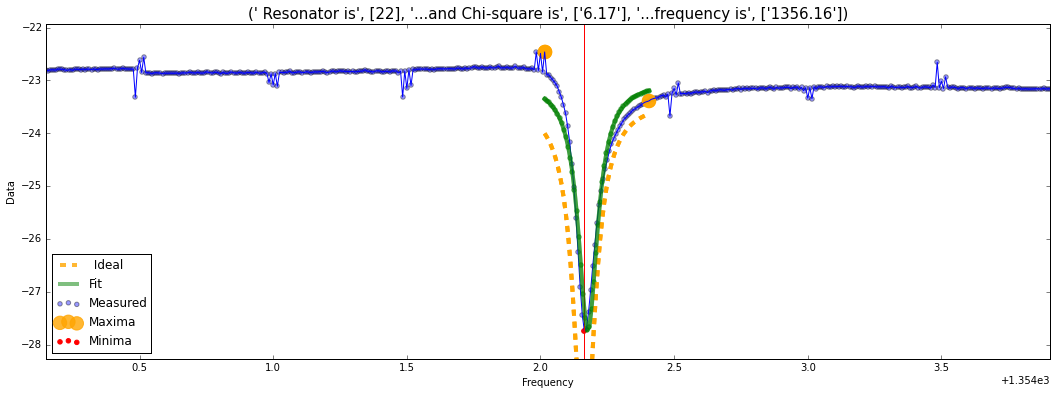

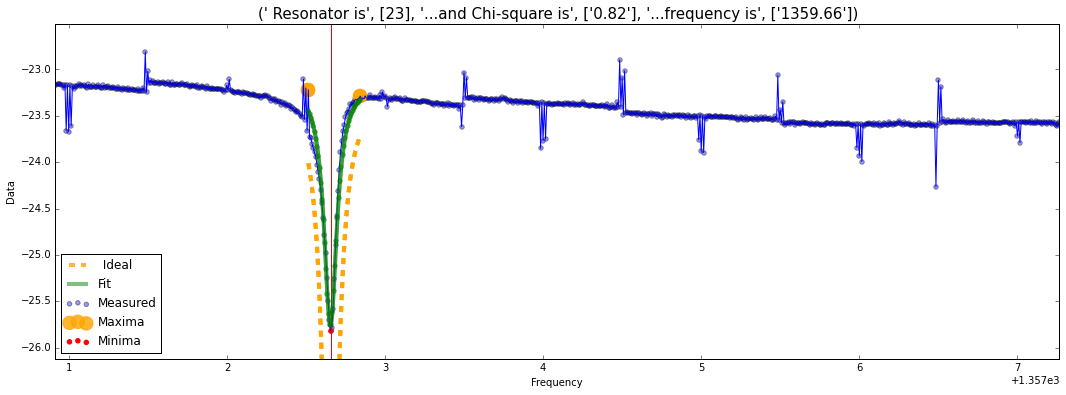

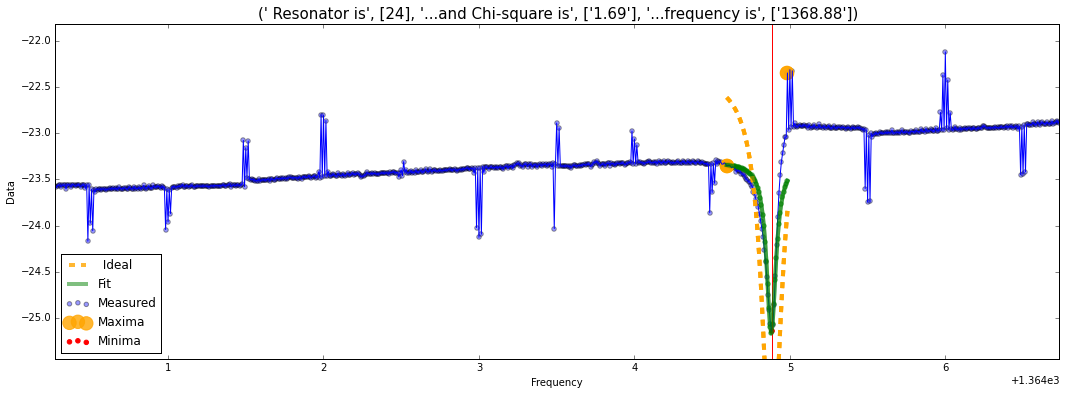

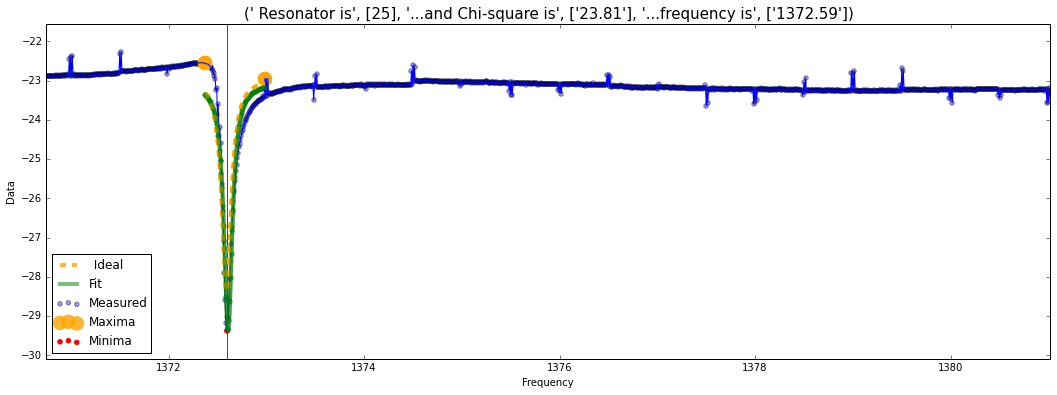

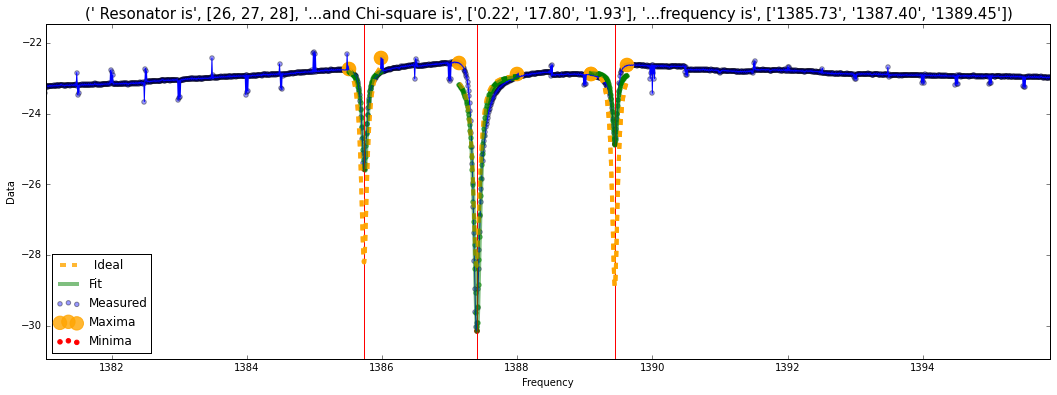

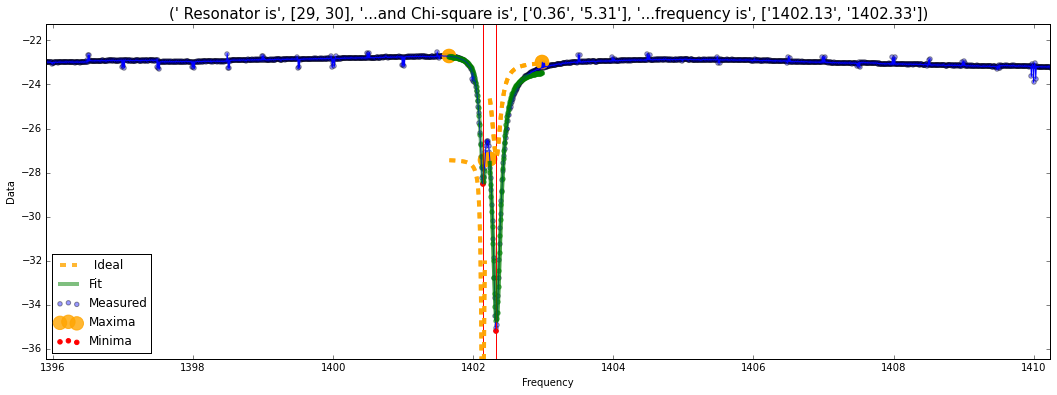

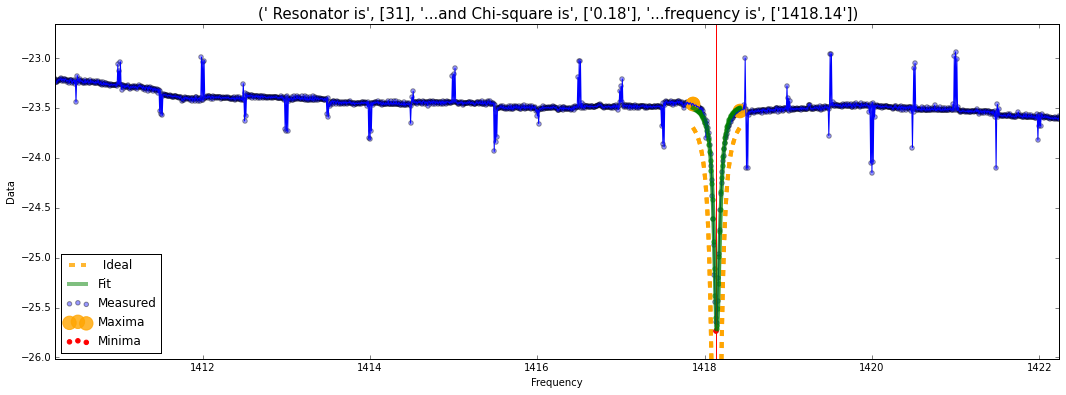

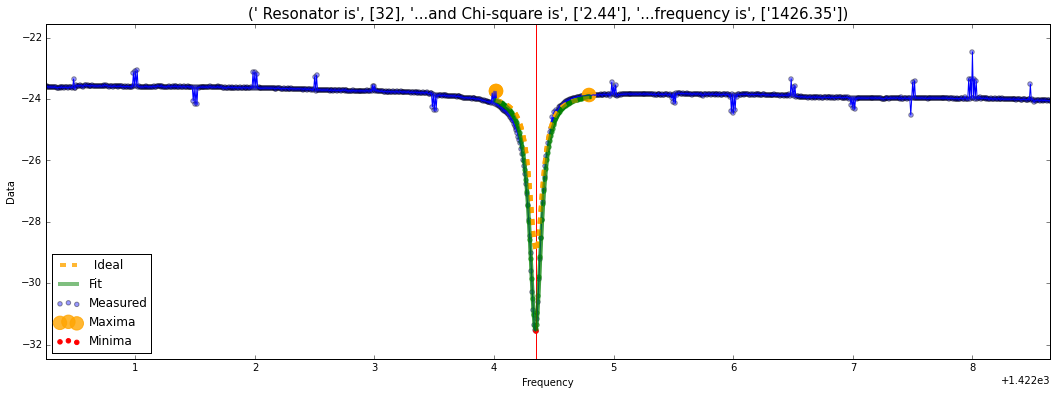

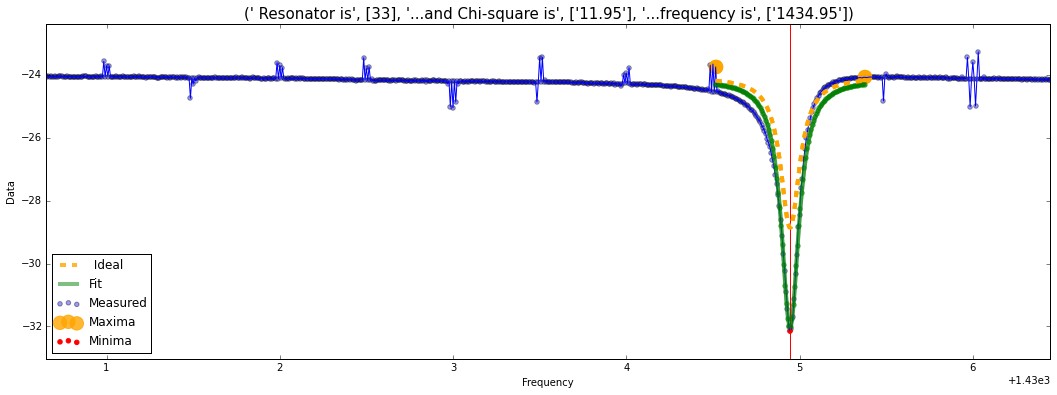

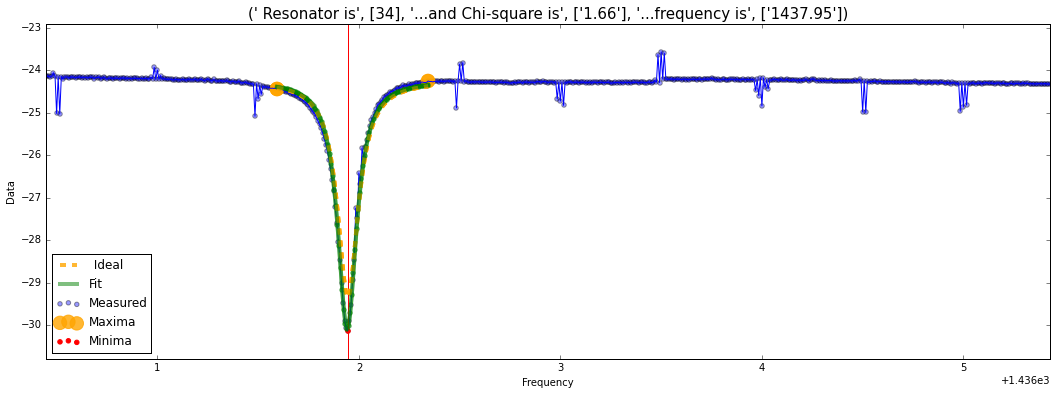

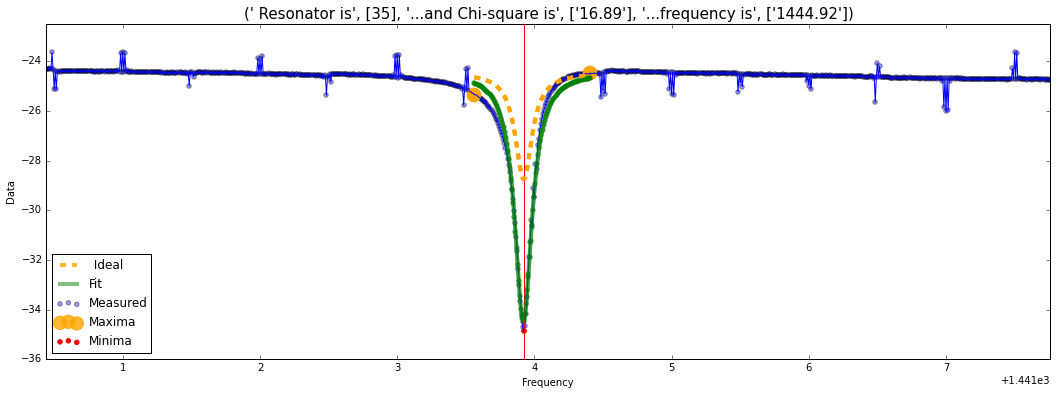

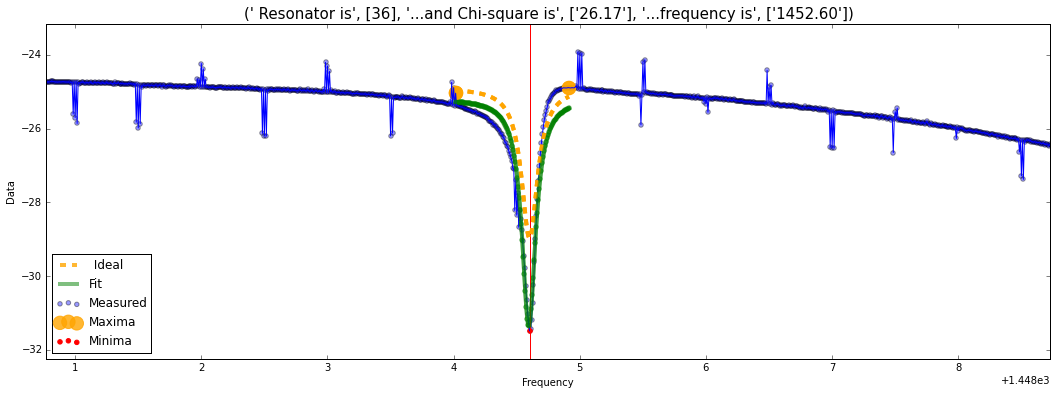

In [18]:
'''And now, you get the option to see the resonators close up, and their chi-squared to the Lorentz function'''
input_a = raw_input ( "Enter : \
1)See Resonance close up \
2)See Resonance close-up w/ Lorentzian only ( This is usually enough ) \
3)See Resonance close-up, and then see Resonance close-up Lorentzian " 
                    )
if input_a == '1':
    drl.show_me_resonators_in_close_range(ranges_to_look, freq_to_look, data_to_look,\
                                          x, y, order_of_mins) 
    
elif input_a == '2':
    count_chi, count_chi_less_than_1, chi_squared_total,freq_points_total, \
    length_of_chi_squared_total = \
    drl.show_me_resonators_in_close_range_with_lorentzian(ranges_to_look, freq_to_look,\
                                                          data_to_look, x, y, move, \
                                                          noise, tol, flat,\
                                                          order_of_mins, locmins)
    
    drl.print_me_those_chi_square(count_chi, count_chi_less_than_1, \
                                  chi_squared_total, freq_points_total)

elif input_a == '3':
    drl.show_me_resonators_in_close_range(ranges_to_look, freq_to_look, data_to_look,\
                                          x, y, order_of_mins) 
    
    count_chi, count_chi_less_than_1, chi_squared_total,freq_points_total, \
    length_of_chi_squared_total = \
    drl.show_me_resonators_in_close_range_with_lorentzian(ranges_to_look, freq_to_look,\
                                                          data_to_look, x, y, move, \
                                                          noise, tol, flat,\
                                                          order_of_mins, locmins)
    
    drl.print_me_those_chi_square(count_chi, count_chi_less_than_1, \
                                  chi_squared_total, freq_points_total)
    
else :
    print "I'm sorry, I don't recognise that input. Please try again"